In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Reading the CSV file
df = pd.read_csv("tiempos.csv")

In [3]:
# Reading the CSV file
df = pd.read_csv("full-table.csv")

Vamos a eliminar las entradas con error.
Estas son las que tienen 0 tiempo en notape

In [4]:
zero_time = np.where(df['notape'] <= 1e-17)
print(zero_time)

(array([], dtype=int64),)


In [5]:
df.drop(zero_time[0], inplace = True)

In [6]:
df.describe()

,notape,tape,ratio,routes,iterations,clients,maxroutes,current,total
count,2427.000000,2427.000000,2427.000000,2427.000000,2427.000000,2427.000000,2427.000000,2427.000000,2427.0
mean,32.707729,48.759323,2.259434,17.873094,36.799753,57.189122,0.517923,15.504326,30.0
std,163.371674,216.677229,0.718694,18.512611,28.247469,34.002341,0.499782,8.657081,0.0
min,0.001000,0.001000,0.500000,4.000000,1.000000,32.000000,0.000000,1.000000,30.0
25%,0.079000,0.227500,1.730769,4.000000,18.000000,33.000000,0.000000,8.000000,30.0
50%,0.625000,1.598000,2.156309,13.000000,25.000000,37.000000,1.000000,16.000000,30.0
75%,3.448000,6.734000,2.713047,20.000000,51.000000,80.000000,1.000000,23.000000,30.0
max,2507.304000,2764.391000,12.000000,78.000000,101.000000,135.000000,1.000000,30.000000,30.0


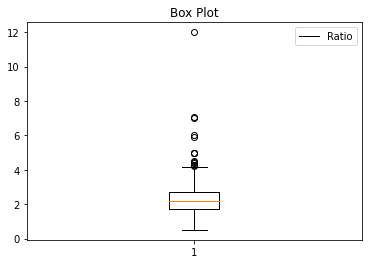

In [7]:
plt.boxplot(df["ratio"])
  
# Title to the plot
plt.title("Box Plot")
  
# Adding the legends
plt.legend(["Ratio"])
plt.show()

Let's compute the number of outliers using IQR

In [7]:
# IQR
Q1 = np.percentile(df['ratio'], 25,
                interpolation = 'midpoint')
  
Q3 = np.percentile(df['ratio'], 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1
print(Q1, Q3, IQR)

1.73076923076923 2.7130473222045746 0.9822780914353446


Al parecer la mayor parte de los elementos están entre 1.73 y 2.71.

Ahora, busquemos los que sean outliers:

In [8]:
# Upper bound
upper_outliers = np.where(df['ratio'] >= (Q3+1.5*IQR))
# let's print the length
print(len(upper_outliers[0]))

15


Veamos cuáles son esos valores:

In [9]:
print(df[(df.ratio>= (Q3+1.5*IQR))])

       problem      criterion   notape   tape      ratio  routes  iterations  \
30     A-N33-K5     RAB          0.012  0.051   4.250000       4          19   
36     A-N33-K5     RAB          0.012  0.051   4.250000       4          16   
373    A-N33-K6     RAB          0.002  0.014   7.000000      17           6   
379    A-N33-K6     RAB          0.001  0.005   5.000000      14           6   
396    A-N33-K6     RAB          0.011  0.047   4.272727       4          16   
405    A-N33-K6     RAB          0.024  0.170   7.083333       4          23   
416    A-N33-K6     RAB          0.009  0.053   5.888889       4          13   
719    A-N32-K5     RAB          0.001  0.012  12.000000      17           5   
747    A-N32-K5     RAB          0.001  0.006   6.000000      17           4   
1014   A-N32-K5     RERF         0.843  3.550   4.211151       4          19   
1112   A-N37-K5     RAB          0.016  0.080   5.000000       4          19   
1113   A-N37-K5     RAB          0.019  

Outliers porque se demoraron menos

In [10]:
# Upper bound
# lower_outliers = np.where(df['ratio'] <= (Q1-1.5*IQR))
lower_outliers = np.where(df['ratio'] <= (Q1 - IQR))

# let's print the length
print(len(lower_outliers[0]))

3


In [10]:
print(df[(df.ratio <= (Q1 - IQR))])

       problem      criterion   notape   tape     ratio  routes  iterations  \
199    A-N33-K5     REF          0.002  0.001  0.500000      23           2   
360    A-N33-K6     RAB          0.061  0.034  0.557377      20           3   
1452   A-N65-K9     RAB          0.011  0.008  0.727273      40           7   

      clients  maxroutes  current  total  
199        33          1       20     30  
360        33          1        1     30  
1452       65          1       16     30  


In [11]:
# cuántos que se hayan demorado menor o igual que 1
len(df[(df.ratio <= 1)])

40

In [14]:
# y cuáles son
df[(df.ratio <= 1)]

,problem,criterion,notape,tape,ratio,routes,iterations,clients,maxroutes,current,total
16,A-N33-K5,RAB,0.002,0.002,1.000000,17,4,33,1,17,30
17,A-N33-K5,RAB,0.004,0.004,1.000000,13,5,33,1,18,30
19,A-N33-K5,RAB,0.001,0.001,1.000000,23,2,33,1,20,30
187,A-N33-K5,REF,0.001,0.001,1.000000,22,2,33,1,8,30
196,A-N33-K5,REF,0.003,0.003,1.000000,17,4,33,1,17,30
198,A-N33-K5,REF,0.002,0.002,1.000000,20,2,33,1,19,30
199,A-N33-K5,REF,0.002,0.001,0.500000,23,2,33,1,20,30
360,A-N33-K6,RAB,0.061,0.034,0.557377,20,3,33,1,1,30
361,A-N33-K6,RAB,0.003,0.003,1.000000,19,5,33,1,2,30
368,A-N33-K6,RAB,0.001,0.001,1.000000,22,3,33,1,9,30


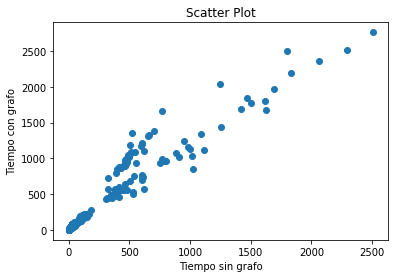

In [12]:
plt.scatter(df["notape"], df["tape"])

# Title to the plot
plt.title("Scatter Plot")
  
# Adding the legends
# plt.legend(["Tiempos de corrida"])
plt.xlabel("Tiempo sin grafo")
plt.ylabel("Tiempo con grafo")
plt.show()

In [13]:
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
%matplotlib inline

<AxesSubplot:>

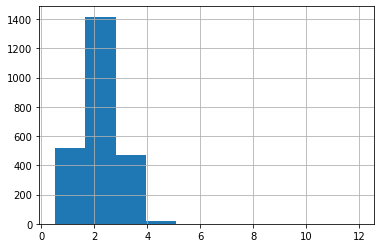

In [14]:
# aquí graficamos un histograma de los ratio
df["ratio"].hist()

In [15]:
# y aquí hacemos la regresión usando sklearn
X = pd.DataFrame(df['notape'])
y = pd.DataFrame(df['tape'])
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
 reg = model.fit(X.iloc[train,:], y.iloc[train,:])
 score = model.score(X.iloc[test,:], y.iloc[test,:])
 scores.append(score)
print(scores)

[0.9626009279223723, 0.9399355456240303, 0.9194556211687123]


In [16]:
reg = LinearRegression().fit(X, y)
print(reg.coef_, reg.intercept_)

[[1.28514509]] [6.72514595]


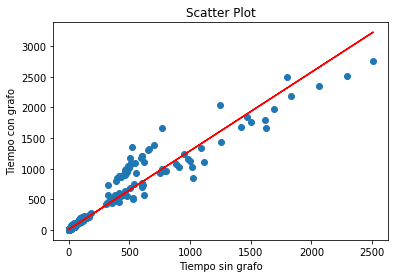

[[1.28514509]] [6.72514595]


In [17]:
plt.scatter(df["notape"], df["tape"])

# Title to the plot
plt.title("Scatter Plot")

# add the line
plt.plot(X, reg.coef_ * X + reg.intercept_, color='r')
  
# Adding the legends
# plt.legend(["Tiempos de corrida"])
plt.xlabel("Tiempo sin grafo")
plt.ylabel("Tiempo con grafo")
plt.show()
print(reg.coef_, reg.intercept_)

In [18]:
# ahora vamos a eliminar los outliers a ver qué tal
# Upper bound
sin_outliers_inferiores = df[(df.ratio >= (Q1 - IQR))]

sin_outliers = sin_outliers_inferiores[(sin_outliers_inferiores.ratio <= (Q3+1.5*IQR))]
len(sin_outliers)

2409

[[1.28508826]] [6.7734649]


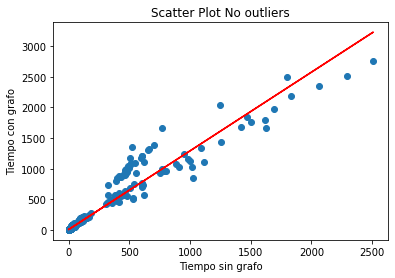

In [19]:
plt.scatter(sin_outliers["notape"], sin_outliers["tape"])

# Title to the plot
plt.title("Scatter Plot No outliers")

Xs = pd.DataFrame(sin_outliers['notape'])
ys = pd.DataFrame(sin_outliers['tape'])

reg2 = LinearRegression().fit(Xs, ys)
print(reg2.coef_, reg2.intercept_)

# add the line
plt.plot(Xs, reg.coef_ * Xs + reg.intercept_, color='r')
  
# Adding the legends
# plt.legend(["Tiempos de corrida"])
plt.xlabel("Tiempo sin grafo")
plt.ylabel("Tiempo con grafo")
plt.show()


In [22]:
# cuántos menores o igual que 1
print(len(sin_outliers[(sin_outliers.ratio <= 1)]))
sin_outliers[(sin_outliers.ratio <= 1)]

37


,problem,criterion,notape,tape,ratio,routes,iterations,clients,maxroutes,current,total
16,A-N33-K5,RAB,0.002,0.002,1.000000,17,4,33,1,17,30
17,A-N33-K5,RAB,0.004,0.004,1.000000,13,5,33,1,18,30
19,A-N33-K5,RAB,0.001,0.001,1.000000,23,2,33,1,20,30
187,A-N33-K5,REF,0.001,0.001,1.000000,22,2,33,1,8,30
196,A-N33-K5,REF,0.003,0.003,1.000000,17,4,33,1,17,30
198,A-N33-K5,REF,0.002,0.002,1.000000,20,2,33,1,19,30
361,A-N33-K6,RAB,0.003,0.003,1.000000,19,5,33,1,2,30
368,A-N33-K6,RAB,0.001,0.001,1.000000,22,3,33,1,9,30
375,A-N33-K6,RAB,0.004,0.004,1.000000,12,6,33,1,16,30
377,A-N33-K6,RAB,0.003,0.003,1.000000,18,4,33,1,18,30


In [24]:
# veamos una descripción de los outliers
sin_outliers.describe()

,notape,tape,ratio,routes,iterations,clients,maxroutes,current,total
count,2409.000000,2409.000000,2409.000000,2409.000000,2409.000000,2409.000000,2409.000000,2409.000000,2409.0
mean,32.950881,49.118256,2.240990,17.914072,36.951432,57.331673,0.518057,15.525114,30.0
std,163.956822,217.445546,0.651907,18.556854,28.278393,34.071768,0.499778,8.650196,0.0
min,0.001000,0.001000,0.800000,4.000000,1.000000,32.000000,0.000000,1.000000,30.0
25%,0.082000,0.233000,1.730748,4.000000,18.000000,33.000000,0.000000,8.000000,30.0
50%,0.676000,1.704000,2.152284,13.000000,26.000000,37.000000,1.000000,16.000000,30.0
75%,3.506000,6.796000,2.707593,20.000000,52.000000,80.000000,1.000000,23.000000,30.0
max,2507.304000,2764.391000,4.176471,78.000000,101.000000,135.000000,1.000000,30.000000,30.0


In [25]:
df.describe()

,notape,tape,ratio,routes,iterations,clients,maxroutes,current,total
count,2427.000000,2427.000000,2427.000000,2427.000000,2427.000000,2427.000000,2427.000000,2427.000000,2427.0
mean,32.707729,48.759323,2.259434,17.873094,36.799753,57.189122,0.517923,15.504326,30.0
std,163.371674,216.677229,0.718694,18.512611,28.247469,34.002341,0.499782,8.657081,0.0
min,0.001000,0.001000,0.500000,4.000000,1.000000,32.000000,0.000000,1.000000,30.0
25%,0.079000,0.227500,1.730769,4.000000,18.000000,33.000000,0.000000,8.000000,30.0
50%,0.625000,1.598000,2.156309,13.000000,25.000000,37.000000,1.000000,16.000000,30.0
75%,3.448000,6.734000,2.713047,20.000000,51.000000,80.000000,1.000000,23.000000,30.0
max,2507.304000,2764.391000,12.000000,78.000000,101.000000,135.000000,1.000000,30.000000,30.0


In [26]:
# IQR
Q1 = np.percentile(df['ratio'], 25,
                interpolation = 'midpoint')
  
Q3 = np.percentile(df['ratio'], 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1
print(Q1, Q3, IQR)

1.73076923076923 2.7130473222045746 0.9822780914353446


In [27]:
# IQR
Q1 = np.percentile(sin_outliers['ratio'], 25,
                interpolation = 'midpoint')
  
Q3 = np.percentile(sin_outliers['ratio'], 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1
print(Q1, Q3, IQR)

1.73074761101743 2.70759289176091 0.97684528074348


In [29]:
# sin outliers
sin_outliers['ratio'].describe()

count    2409.000000
mean        2.240990
std         0.651907
min         0.800000
25%         1.730748
50%         2.152284
75%         2.707593
max         4.176471
Name: ratio, dtype: float64

In [30]:
# todos los datos
df['ratio'].describe()

count    2427.000000
mean        2.259434
std         0.718694
min         0.500000
25%         1.730769
50%         2.156309
75%         2.713047
max        12.000000
Name: ratio, dtype: float64

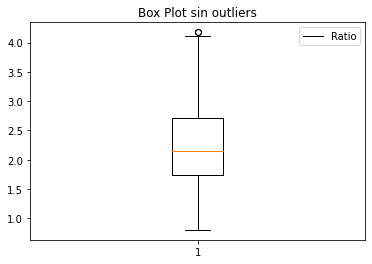

In [31]:
plt.boxplot(sin_outliers["ratio"])
  
# Title to the plot
plt.title("Box Plot sin outliers")
  
# Adding the legends
plt.legend(["Ratio"])
plt.show()

In [32]:
# cuántos que se hayan demorado menor o igual que 1
len(sin_outliers[(sin_outliers.ratio <= 1)])

37

In [34]:
# veamos cuáles son los que están por debajo de 1 ;-)
menores_que_uno = sin_outliers[(sin_outliers.ratio <= 1)]

In [51]:
menores_que_uno[["problem   ","criterion ","ratio","notape","tape"]]

,problem,criterion,ratio,notape,tape
16,A-N33-K5,RAB,1.000000,0.002,0.002
17,A-N33-K5,RAB,1.000000,0.004,0.004
19,A-N33-K5,RAB,1.000000,0.001,0.001
187,A-N33-K5,REF,1.000000,0.001,0.001
196,A-N33-K5,REF,1.000000,0.003,0.003
198,A-N33-K5,REF,1.000000,0.002,0.002
361,A-N33-K6,RAB,1.000000,0.003,0.003
368,A-N33-K6,RAB,1.000000,0.001,0.001
375,A-N33-K6,RAB,1.000000,0.004,0.004
377,A-N33-K6,RAB,1.000000,0.003,0.003


In [57]:
total_menores_que_uno = df[(df.ratio <= 1)]
total_menores_que_uno[["problem   ","criterion ","ratio","notape","tape"]]

,problem,criterion,ratio,notape,tape
16,A-N33-K5,RAB,1.000000,0.002,0.002
17,A-N33-K5,RAB,1.000000,0.004,0.004
19,A-N33-K5,RAB,1.000000,0.001,0.001
187,A-N33-K5,REF,1.000000,0.001,0.001
196,A-N33-K5,REF,1.000000,0.003,0.003
198,A-N33-K5,REF,1.000000,0.002,0.002
199,A-N33-K5,REF,0.500000,0.002,0.001
360,A-N33-K6,RAB,0.557377,0.061,0.034
361,A-N33-K6,RAB,1.000000,0.003,0.003
368,A-N33-K6,RAB,1.000000,0.001,0.001
